In [1]:
from pressure_over_inverse_area import plot_pressure_over_inverse_area

In [2]:
delta_t = 0.03

In [3]:
impulse_files = [
    "../Simulation/Out200-N500-L0.05-ITER500000-POST50-wallEvents-w-0.09.txt"
]
    
Ls = [
    0.05
]
    
stationary_ts = [
    100
]

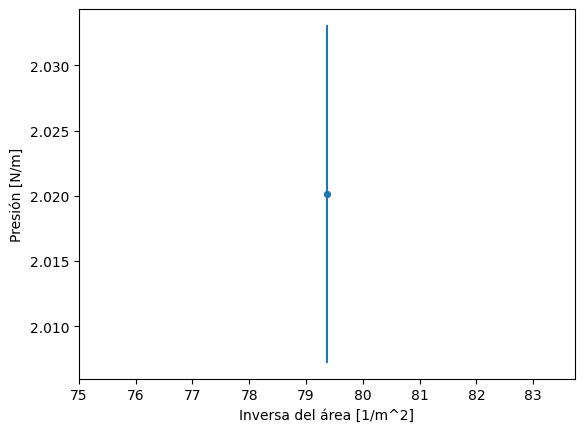

In [4]:
plot_pressure_over_inverse_area(impulse_files, Ls, delta_t, stationary_ts)